# Phase 2: Exploration - Data Overview

## Overview

Understand the structure and basic characteristics of the crime dataset.

### Objectives
1. Load consolidated Parquet file
2. Display shape, columns, and data types
3. Show sample records and basic statistics
4. Visualize distributions of key columns
5. Identify temporal coverage

## Cell 1: Setup and Imports

In [5]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to path
PROJECT_ROOT = Path.cwd().parent.parent
sys.path.insert(0, str(PROJECT_ROOT))

# Force clear cached modules
import importlib
for mod in list(sys.modules.keys()):
    if mod.startswith('src'):
        del sys.modules[mod]

from src.data import loader
from src.analysis import profiler
from src.utils.config import get_processed_data_path

# Configure visualization
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Imports successful")

Imports successful


## Cell 2: Load Data

In [6]:
# Load the consolidated crime data
df = loader.load_crime_data()
print(f"Loaded {len(df):,} crime records")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loaded 3,496,353 crime records
Memory usage: 1124.02 MB


## Cell 3: Basic Info

In [7]:
print("=" * 60)
print("DATA SHAPE AND STRUCTURE")
print("=" * 60)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns\n")

print("Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df.dtypes)

DATA SHAPE AND STRUCTURE
Shape: 3,496,353 rows × 16 columns

Columns:
   1. the_geom
   2. cartodb_id
   3. the_geom_webmercator
   4. objectid
   5. dc_dist
   6. psa
   7. dispatch_date_time
   8. dispatch_date
   9. dispatch_time
  10. hour
  11. dc_key
  12. location_block
  13. ucr_general
  14. text_general_code
  15. point_x
  16. point_y

DATA TYPES
the_geom                dictionary<values=string, indices=int32, order...
cartodb_id                                                 int64[pyarrow]
the_geom_webmercator    dictionary<values=string, indices=int32, order...
objectid                                                   int64[pyarrow]
dc_dist                                                    int64[pyarrow]
psa                     dictionary<values=string, indices=int8, ordere...
dispatch_date_time                         timestamp[ns, tz=UTC][pyarrow]
dispatch_date           dictionary<values=string, indices=int16, order...
dispatch_time           dictionary<values=string

## Cell 4: Data Profiling

In [8]:
# Use the DataProfiler utility
profile = profiler.DataProfiler(df)

print("\n" + "=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
summary = profile.get_summary()
for key, value in summary.items():
    print(f"{key}: {value}")


SUMMARY STATISTICS
shape: (3496353, 16)
columns: ['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid', 'dc_dist', 'psa', 'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour', 'dc_key', 'location_block', 'ucr_general', 'text_general_code', 'point_x', 'point_y']
memory_usage: 1178624856
numerical_stats: {'cartodb_id': {'min': 1.0, 'max': 3496354.0, 'mean': 1748177.9831698916}, 'objectid': {'min': 1.0, 'max': 35976752.0, 'mean': 3953572.638660055}, 'dc_dist': {'min': 1.0, 'max': 92.0, 'mean': 17.37923115886754}, 'hour': {'min': 0.0, 'max': 23.0, 'mean': 13.2310624765034}, 'dc_key': {'min': 120024003636.0, 'max': 202503028015001.0, 'mean': 201614066748.26465}, 'ucr_general': {'min': 100.0, 'max': 2600.0, 'mean': 1206.4348479687262}, 'point_x': {'min': -80.50237161, 'max': 2746280.55656938, 'mean': 190.165902381908}, 'point_y': {'min': 0.0, 'max': 301244.66121389, 'mean': 64.8328808102884}}


## Cell 5: Sample Records

In [9]:
print("\n" + "=" * 60)
print("SAMPLE RECORDS (First 10)")
print("=" * 60)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
print(df.head(10))


SAMPLE RECORDS (First 10)
                                             the_geom  cartodb_id  \
0                                                <NA>      112510   
1                                                <NA>      112515   
2  0101000020E6100000744F32FA70CB52C0180C6B53CAF64340      112853   
3  0101000020E6100000684000806EC952C0885ACBB8B7004440      112867   
4  0101000020E61000003CAB274EC9C952C098FB38956AF64340      112948   
5  0101000020E6100000247D4D1B5DC252C048BD5028DA044440      113909   
6  0101000020E6100000CC8D77B4C2CA52C0F8B3764DDBFA4340      113910   
7  0101000020E6100000ACC8C6BB37C752C0D8A5E129DEFF4340      115023   
8  0101000020E610000098D32F883DC452C0082DB679FE024440      115683   
9  0101000020E6100000F4FB2B4F53C852C07065709E2E034440      115704   

                                 the_geom_webmercator  objectid  dc_dist psa  \
0                                                <NA>  35969781        1   H   
1                                                <NA>

## Cell 6: Temporal Coverage

In [10]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Span: {(df['date'].max() - df['date'].min()).days} days ({(df['date'].max() - df['date'].min()).days / 365:.1f} years)")
    print(f"\nRecords by year:")
    print(df.groupby(df['date'].dt.year).size())

## Cell 7: Key Distributions

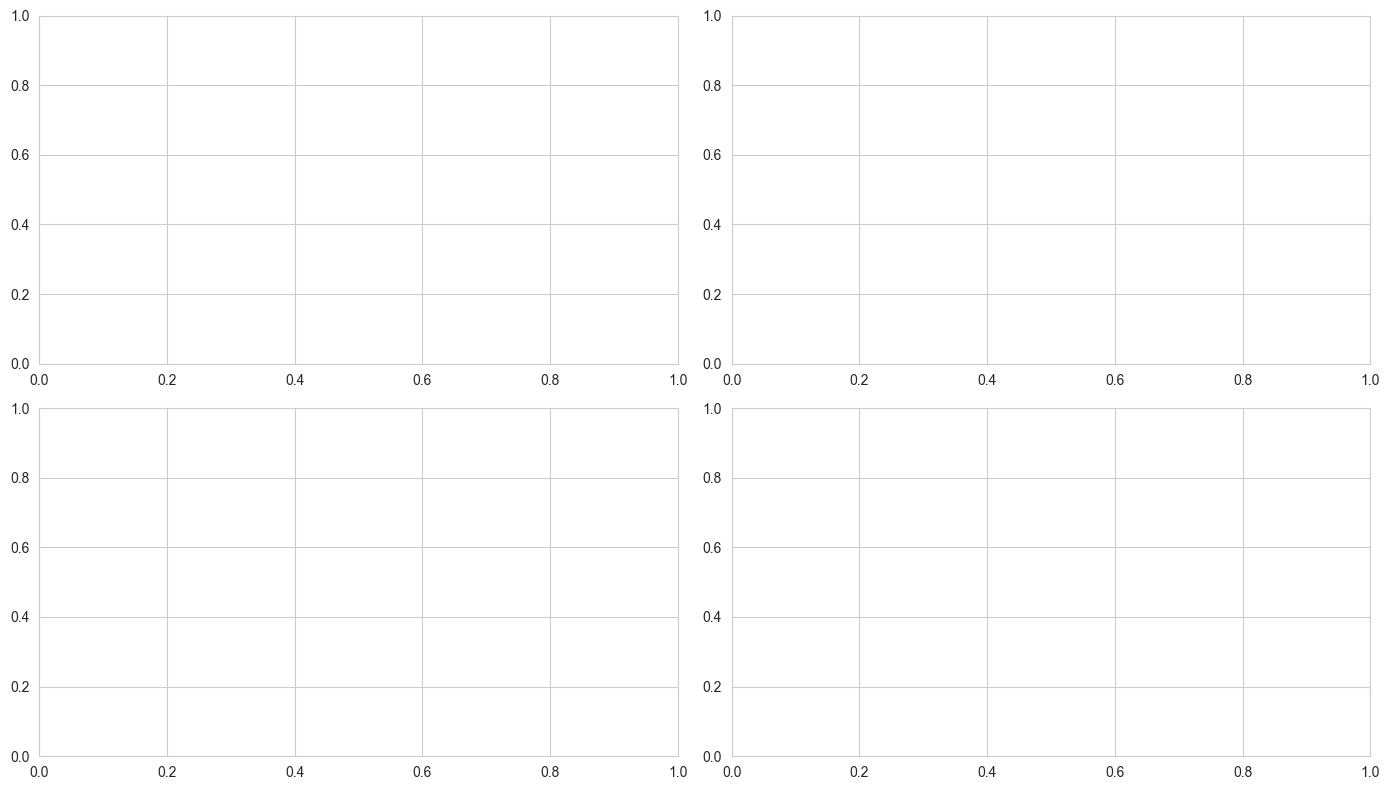

In [11]:
# Create a quick visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Records by year
if 'date' in df.columns:
    df.groupby(df['date'].dt.year).size().plot(ax=axes[0, 0], kind='bar')
    axes[0, 0].set_title('Records by Year')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Count')

# Top crime types
if 'general_crime_category' in df.columns:
    df['general_crime_category'].value_counts().head(10).plot(ax=axes[0, 1], kind='barh')
    axes[0, 1].set_title('Top 10 Crime Types')
    axes[0, 1].set_xlabel('Count')

# Top districts
if 'district' in df.columns:
    df['district'].value_counts().head(10).plot(ax=axes[1, 0], kind='barh')
    axes[1, 0].set_title('Top 10 Districts')
    axes[1, 0].set_xlabel('Count')

# Records by month (last year)
if 'date' in df.columns:
    last_year = df[df['date'] >= df['date'].max() - pd.Timedelta(days=365)]
    last_year.groupby(last_year['date'].dt.month).size().plot(ax=axes[1, 1])
    axes[1, 1].set_title('Records by Month (Last Year)')
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Summary

✓ **Data overview complete!** You now understand:
- Dataset size and structure
- Available columns and data types
- Temporal coverage
- Distribution of records across years, crime types, and districts

### Next Steps
- Proceed to **02_data_quality_assessment.ipynb** to identify data quality issues
- Or jump to Phase 3 if quality looks good